<h1 style="font-size:3rem;color:Black;">  Section 3.2 Détection d’un problème  </h1>

## 1. Représentez la distribution du mois de soutenance pour l’intégralité du jeu de données, sur la période 1984-2018

In [1]:
import matplotlib
import pandas as pd
import numpy as np
import datetime
data=pd.read_csv('PhD_v2.csv', on_bad_lines='skip',low_memory=False)
#data.info()
print(' ====add one colomn which only has the monthly information for the phD defence=============== ')
data["month de soutenance"]=pd.DatetimeIndex(data["Date de soutenance"]).month
print(data.info() )
 

 ====add one colomn which only has the monthly information for the phD defence=============== 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447644 entries, 0 to 447643
Data columns (total 19 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Auteur                                    447644 non-null  object 
 1   Identifiant auteur                        317655 non-null  object 
 2   Titre                                     447635 non-null  object 
 3   Directeur de these                        447629 non-null  object 
 4   Directeur de these (nom prenom)           447629 non-null  object 
 5   Identifiant directeur                     447644 non-null  object 
 6   Etablissement de soutenance               447640 non-null  object 
 7   Identifiant etablissement                 430559 non-null  object 
 8   Discipline                                447639 non-null  object 
 9

===============Question 1. why the choise of the year stop at 2018?============
max year: 2020.0    min year:  1971.0


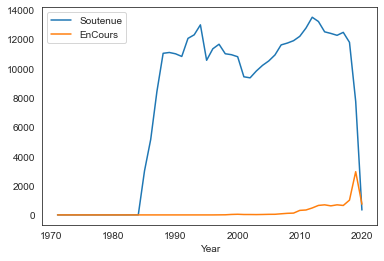

There are totally  68   years of records
<class 'pandas.core.series.Series'>
Year    Statut    Statut  
2020.0  soutenue  soutenue    335
Name: Statut, dtype: int64
Index(['enCours', 'soutenue'], dtype='object', name='Statut')
Float64Index([1971.0, 1972.0, 1973.0, 1976.0, 1979.0, 1980.0, 1982.0, 1984.0,
              1985.0, 1986.0, 1987.0, 1988.0, 1989.0, 1990.0, 1991.0, 1992.0,
              1993.0, 1994.0, 1995.0, 1996.0, 1997.0, 1998.0, 1999.0, 2000.0,
              2001.0, 2002.0, 2003.0, 2004.0, 2005.0, 2006.0, 2007.0, 2008.0,
              2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015.0, 2016.0,
              2017.0, 2018.0, 2019.0, 2020.0],
             dtype='float64', name='Year')
Int64Index([1971, 1972, 1973, 1976, 1979, 1980, 1982, 1984, 1985, 1986, 1987,
            1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
            1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
            2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,

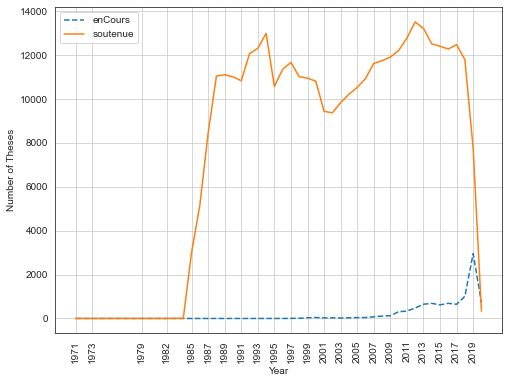

,Statue_enCours,Statue_soutenue
Year,,
1971.0,0,1
1972.0,0,1
1973.0,0,1
1976.0,0,1
1979.0,0,1
1980.0,0,1
1982.0,0,1
1984.0,0,6
1985.0,0,3007


In [38]:
import matplotlib.pyplot as plt
CRED = '\033[91m'
CEND = '\033[0m'
grb='\033[4m'
print(grb + '===============Question 1. why the choise of the year stop at 2018?============' + CEND)
print( 'max year: ' + str(data['Year'].max())+'    min year:  '+str(data['Year'].min()) )

#method 2
evo_Sou=data.groupby(['Year']).apply(lambda x: (x['Statut']=='soutenue').sum()).plot(kind='line',label='Soutenue')
evo_encore=data.groupby(['Year']).apply(lambda x: (x['Statut']=='enCours').sum()).plot(kind='line',label='EnCours')
plt.legend()
plt.show()


##ref
#https://stackoverflow.com/questions/53908735/groupby-sum-and-count-on-multiple-columns-under-multiple-conditions-in-python
#method 1 
#https://www.youtube.com/watch?v=4Tds_P36-W0=============================
evo=data.groupby(['Year','Statut'] )['Statut'].value_counts() 
print('There are totally  '+str(len(evo)) +'   years of records' )
print(type(evo)) 
print(evo[-1:])

##  method4
df = pd.DataFrame()
df['Year']=data['Year']
df['Statut']=data['Statut']
df1=pd.pivot_table(df, index='Year', columns='Statut', aggfunc=len, fill_value=0)
print( df1.columns )
print( df1.index )
plt.figure(figsize=(8, 6))
plt.plot(df1.enCours,label='enCours',linestyle='--')
plt.plot(df1.soutenue,label='soutenue',linestyle='-')
print( df1.index.astype(int) )
x_tic1=df1.index.astype(int)
x_tic=x_tic1[::2]
plt.xticks(x_tic, x_tic.astype('str'), rotation='vertical')
plt.grid()
plt.xlabel('Year')
plt.ylabel('Number of Theses')
plt.legend( )


plt.show()


##  method3
def my_agg(x):
    names={
        'Statue_enCours': x[x['Statut']=='enCours']['Year'].count(),
        'Statue_soutenue': x[x['Statut']=='soutenue']['Year'].count(),
    }
    return pd.Series(names)
df=pd.DataFrame.from_dict(data)
df.groupby('Year').apply(my_agg)



1.0     83559
12.0    16556
11.0    15275
9.0     11597
10.0    10054
6.0      9206
5.0      6100
3.0      6025
4.0      4866
7.0      4593
2.0      4404
8.0      3483
Name: month de soutenance, dtype: int64


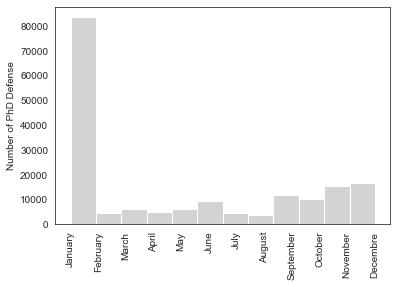

=============Question 2. how do you explain for the month of January indicated in the figure?=============


In [39]:
month_soutien=data.loc[(data['Year']<2019)&(data['Year']>2004),
                       'month de soutenance']
#n,edge=month_soutien.hist(bins=12)
print(month_soutien.value_counts())
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],
            ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'Decembre'],
           rotation='vertical')
month_soutien.hist( bins=12 , color='lightgrey')
plt.ylabel('Number of PhD Defense')
plt.grid(False)
plt.show()

#plt.savefig('EvoDef_Month_2005_2018.png')
CRED = '\033[91m'
CEND = '\033[0m'
grb='\033[4m'
print(grb + '=============Question 2. how do you explain for the month of January indicated in the figure?=============' + CEND)

## 2. Vous devez représentez en premier lieu la distribution du mois de soutenance pour chaque année, de 2005 à 2018.

     Year  month de soutenance
5  2008.0                 11.0
6  2005.0                  1.0
7  2009.0                  8.0
8  2013.0                 10.0
9  2011.0                  6.0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 175718 entries, 5 to 447628
Data columns (total 2 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Year                 175718 non-null  float64
 1   month de soutenance  175718 non-null  float64
dtypes: float64(2)
memory usage: 4.0 MB
None
          Year  month de soutenance
5       2008.0                 11.0
6       2005.0                  1.0
7       2009.0                  8.0
8       2013.0                 10.0
9       2011.0                  6.0
...        ...                  ...
447596  2018.0                  6.0
447597  2015.0                 11.0
447612  2018.0                 12.0
447622  2018.0                  7.0
447628  2018.0                 11.0

[175718 rows x 2 colum

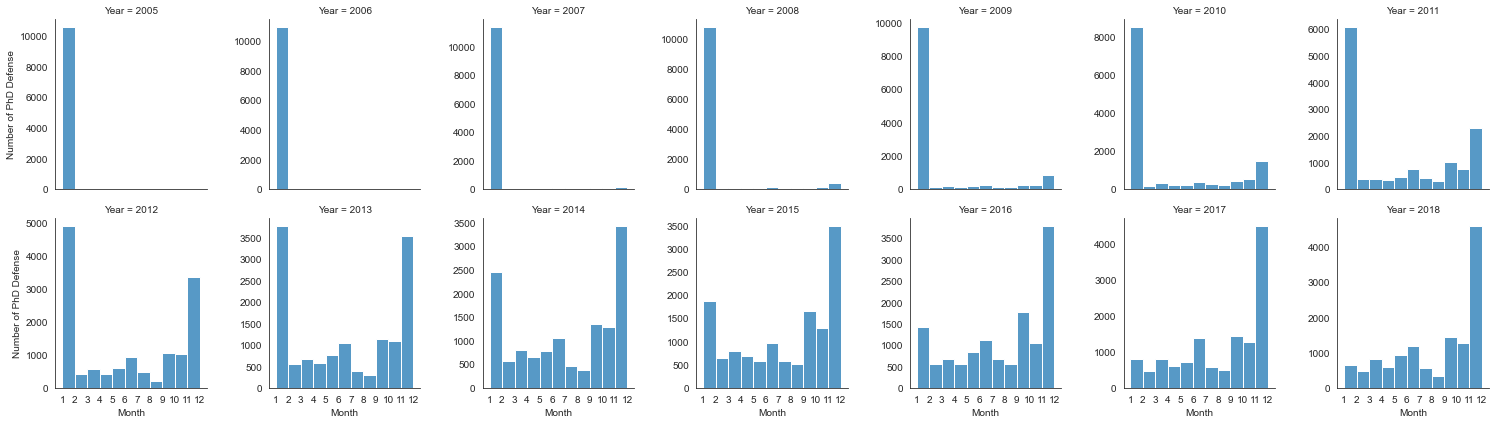

In [40]:
month_soutien_year=data.loc[ (data['Year']>2004)&(data['Year']<2019),['Year','month de soutenance']].copy()
print(month_soutien_year.head())
print(month_soutien_year.info())
##reference pour seaborn
##https://seaborn.pydata.org/generated/seaborn.FacetGrid.html
##https://seaborn.pydata.org/generated/seaborn.histplot.html
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
sns.set_style('white')
Year14=sns.FacetGrid(data=month_soutien_year.astype('int'),col='Year',sharey=False, col_wrap=7)
Year14.map_dataframe(sns.histplot,'month de soutenance',binwidth=1)
Year14.set_axis_labels('Month','Number of PhD Defense')
Year14.set(xticks=np.arange(1,13,1))
Year14.set_xticklabels(np.arange(1,13,1))
print(month_soutien_year)
#,xlim=(1,13)


      Year  month de soutenance
5   2008.0                 11.0
7   2009.0                  8.0
8   2013.0                 10.0
9   2011.0                  6.0
10  2010.0                 11.0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 152351 entries, 5 to 447597
Data columns (total 2 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Year                 152351 non-null  float64
 1   month de soutenance  152351 non-null  float64
dtypes: float64(2)
memory usage: 3.5 MB
None
          Year  month de soutenance
5       2008.0                 11.0
7       2009.0                  8.0
8       2013.0                 10.0
9       2011.0                  6.0
10      2010.0                 11.0
...        ...                  ...
447467  2014.0                 10.0
447524  2014.0                 12.0
447533  2014.0                 11.0
447586  2015.0                  3.0
447597  2015.0                 11.0

[152351 rows x 2

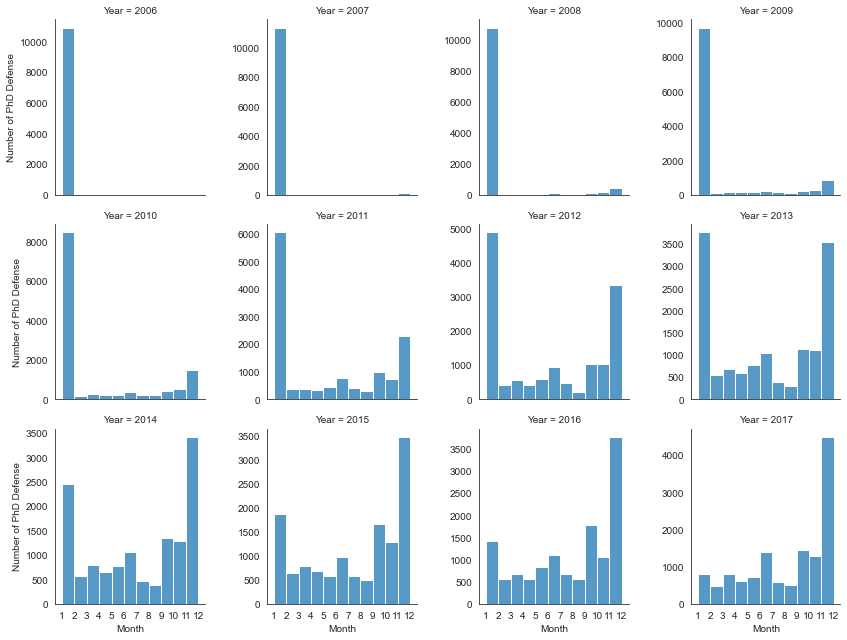

In [42]:
month_soutien_year=data.loc[ (data['Year']>2005)&(data['Year']<2018),['Year','month de soutenance']].copy()
print(month_soutien_year.head())
print(month_soutien_year.info())
##reference pour seaborn
##https://seaborn.pydata.org/generated/seaborn.FacetGrid.html
##https://seaborn.pydata.org/generated/seaborn.histplot.html
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
sns.set_style('white')
Year12=sns.FacetGrid(data=month_soutien_year.astype('int'),col='Year',sharey=False, col_wrap=4)
Year12.map_dataframe(sns.histplot,'month de soutenance',binwidth=1)
Year12.set_axis_labels('Month','Number of PhD Defense')
Year12.set(xticks=np.arange(1,13,1))
Year12.set_xticklabels(np.arange(1,13,1))
print(month_soutien_year)
#,xlim=(1,13)

##  3. compilez toutes les années pour ne produire qu’un seul et unique graphique, avec une erreur-type,

In [43]:
data["jour_de_soutenance"]=pd.DatetimeIndex(data["Date de soutenance"]).day

In [44]:
data.info()
year_month_day=data.loc[:,['Year', 'month de soutenance', "jour_de_soutenance" ]].copy()
print(year_month_day.info())
evo_year=year_month_day.groupby(['Year'])['month de soutenance'].count().reset_index()
evo_year.columns=['Year','YearSum']
print(evo_year )
evo_14year=evo_year.loc[ (evo_year.Year > 2004)& (evo_year.Year <2019 ), :]
print( evo_14year)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447644 entries, 0 to 447643
Data columns (total 20 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Auteur                                    447644 non-null  object 
 1   Identifiant auteur                        317655 non-null  object 
 2   Titre                                     447635 non-null  object 
 3   Directeur de these                        447629 non-null  object 
 4   Directeur de these (nom prenom)           447629 non-null  object 
 5   Identifiant directeur                     447644 non-null  object 
 6   Etablissement de soutenance               447640 non-null  object 
 7   Identifiant etablissement                 430559 non-null  object 
 8   Discipline                                447639 non-null  object 
 9   Statut                                    447644 non-null  object 
 10  Date de premiere ins

In [45]:
year14_month_day=year_month_day.loc[  (year_month_day.Year > 2004)& (year_month_day.Year <2019 ) ,['Year', 'month de soutenance', 'jour_de_soutenance' ]]
year14_month_day.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175718 entries, 5 to 447628
Data columns (total 3 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Year                 175718 non-null  float64
 1   month de soutenance  175718 non-null  float64
 2   jour_de_soutenance   175718 non-null  float64
dtypes: float64(3)
memory usage: 5.4 MB


          Year  month de soutenance  jour_de_soutenance
79      2015.0                  1.0                 1.0
134     2015.0                  1.0                 1.0
615     2012.0                  1.0                 1.0
629     2014.0                  1.0                 1.0
844     2012.0                  1.0                 1.0
...        ...                  ...                 ...
447269  2006.0                  1.0                 1.0
447281  2008.0                  1.0                 1.0
447321  2006.0                  1.0                 1.0
447327  2006.0                  1.0                 1.0
447375  2008.0                  1.0                 1.0

[77810 rows x 3 columns]
      Year  Sum_1_1
0   2005.0    10522
1   2006.0    10885
2   2007.0    11349
3   2008.0    10686
4   2009.0     9554
5   2010.0     8190
6   2011.0     5605
7   2012.0     4398
8   2013.0     3237
9   2014.0     1666
10  2015.0     1069
11  2016.0      633
12  2017.0       15
13  2018.0        1
[0

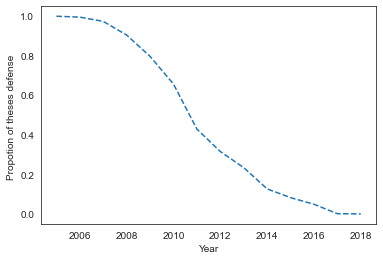

In [46]:
these_1_1=year14_month_day.loc[(year_month_day['month de soutenance']==1) & (year_month_day['jour_de_soutenance']==1)].copy()
print(these_1_1)

evo_year_1_1=these_1_1.groupby('Year')['jour_de_soutenance'].count().reset_index()
evo_year_1_1.columns=['Year','Sum_1_1']
print(evo_year_1_1 )

Sumtotal=[]
Sumtotal=list( evo_14year['YearSum'].astype(int))
Jan_1_1=list( evo_year_1_1['Sum_1_1'].astype(int))
 
Evo_perc_1_1 = [i / j for i, j in zip(Jan_1_1, Sumtotal)]
print( Evo_perc_1_1 )
import matplotlib.pyplot as plt
import matplotlib
plt.plot( range(2005,2019,1), Evo_perc_1_1 , linestyle='--' )
plt.xlabel('Year')
plt.ylabel('Propotion of theses defense ')
plt.show()




In [47]:
evo_year_month=year14_month_day.groupby(['Year','month de soutenance'])['month de soutenance'].count()
#evo_year_month.columns=['Year','month de soutenance','monthSum']
print( evo_year_month  )

Year    month de soutenance
2005.0  1.0                    10526
        2.0                        1
        3.0                        2
        4.0                        1
        5.0                        2
                               ...  
2018.0  8.0                      336
        9.0                     1432
        10.0                    1270
        11.0                    2229
        12.0                    2357
Name: month de soutenance, Length: 168, dtype: int64


month de soutenance   1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   9.0   \
Year                                                                         
2006.0               10889     4     2     2     8     7     2     6     8   
2007.0               11355     7    11    13    13    36    25    11    33   
2008.0               10744    55    63    63    72   106    40    48    88   
2009.0                9693   109   164   136   153   224   131   100   239   
2010.0                8458   176   287   205   202   375   234   212   394   

month de soutenance  10.0  11.0  12.0  
Year                                   
2006.0                 22    19     6  
2007.0                 54    72    67  
2008.0                159   230   186  
2009.0                252   409   423  
2010.0                501   616   856  
Year
2006.0    10975
2007.0    11697
2008.0    11854
2009.0    12033
2010.0    12516
2011.0    13110
2012.0    13985
2013.0    13868
2014.0    13202
2015.0    13023
2016.0  

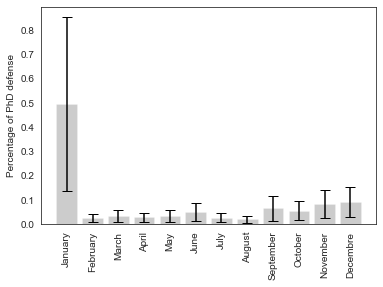

In [48]:
##https://stackoverflow.com/questions/19222711/python-histogram-with-points-and-error-bars
#print('==============standered errorbar(yerr=np.sqrt(counts))=========== ')
##method1
#counts,bins_edges,patches=plt.hist(month_soutien_year['month de soutenance'],bins=12)
#bin_centres = 0.5*(bins_edges[1:] + bins_edges[:-1])
#plt.errorbar(x=bin_centres, y=counts, yerr=np.sqrt(counts)*20,fmt='o',capsize=6 )
#plt.xlabel('Month')
#plt.ylabel('Distribution')
#plt.show()


#print(counts)
##method2
yearly_soutien_total=month_soutien_year.groupby('month de soutenance')['Year'].count()
#print(yearly_soutien_total)
yearly_soutien_propre=yearly_soutien_total
#print(month_soutien_year.groupby('Year').count())
#print(yearly_soutien_propre)
#plt.bar(yearly_soutien_propre)

##method percentage
pivotTable=pd.pivot_table(month_soutien_year,index='Year',columns='month de soutenance', aggfunc=len, fill_value=0)
#print(pivotTable.columns)
print(pivotTable.head())
pivotTable['sum']= pivotTable.sum(axis=1)
print( pivotTable['sum'] )
#print(pivotTable.loc[2005,1])
pivotTable_percen=pivotTable.loc[:,1:12].div(pivotTable['sum'], axis=0)
print(pivotTable_percen.head())
#print('=============')
print( pivotTable_percen.mean() )
print('=============')
print( pivotTable_percen.std() )
x=range(1,13)
fig, ax1 = plt.subplots()
ax1.bar(x,pivotTable_percen.mean(),yerr=pivotTable_percen.std(),align='center', alpha=0.2, ecolor='black', capsize=5,color='black')
#ax2.bar(x,pivotTable_percen.std()/pivotTable_percen.mean(),align='center', alpha=0.2, ecolor='black', capsize=5) 
plt.ylabel('Percentage of PhD defense')
#plt.xlabel('Month')
#Year14_per.set(xticks=x)
#Year14_per.set_xticklabels(np.x)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],
            ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'Decembre'],
           rotation='vertical')
plt.savefig('EvoDefPerc_Month_2005_2018.png')
plt.show()
    

In [49]:
year14_month_day.info()
print( year14_month_day.Year.max() )
print( year14_month_day['month de soutenance'].max() )
print( year14_month_day['jour_de_soutenance'].max() )

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175718 entries, 5 to 447628
Data columns (total 3 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Year                 175718 non-null  float64
 1   month de soutenance  175718 non-null  float64
 2   jour_de_soutenance   175718 non-null  float64
dtypes: float64(3)
memory usage: 5.4 MB
2018.0
12.0
31.0


MultiIndex([('jour_de_soutenance',  1.0),
            ('jour_de_soutenance',  2.0),
            ('jour_de_soutenance',  3.0),
            ('jour_de_soutenance',  4.0),
            ('jour_de_soutenance',  5.0),
            ('jour_de_soutenance',  6.0),
            ('jour_de_soutenance',  7.0),
            ('jour_de_soutenance',  8.0),
            ('jour_de_soutenance',  9.0),
            ('jour_de_soutenance', 10.0),
            ('jour_de_soutenance', 11.0),
            ('jour_de_soutenance', 12.0)],
           names=[None, 'month de soutenance'])
                    jour_de_soutenance                                     \
month de soutenance               1.0  2.0  3.0  4.0  5.0  6.0  7.0  8.0    
Year                                                                        
2005.0                               4    1    2    1    2    4    4    2   
2006.0                               4    4    2    2    8    7    2    6   
2007.0                               6    7   11   13   13   3

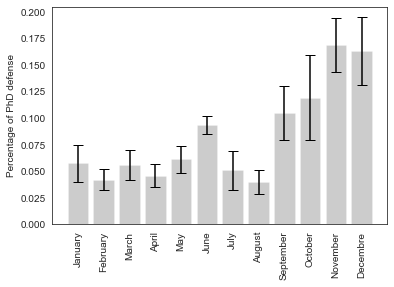

In [51]:
##method percentage  no 1/1
year14_month_day=year_month_day.loc[  (year_month_day.Year > 2004)& (year_month_day.Year <2019 ) ,['Year', 'month de soutenance', 'jour_de_soutenance' ]]
indexes = year14_month_day[ (year14_month_day['month de soutenance'] == 1) & (year14_month_day['jour_de_soutenance']==1) ].index
month_soutien_year_no11=pd.DataFrame()
month_soutien_year_no11=year14_month_day.copy()
month_soutien_year_no11.drop(indexes,inplace = True)

####
#month_soutien_year_no11=year14_month_day.loc[~((year14_month_day['month de soutenance']==1) & (year14_month_day['jour_de_soutenance']==1)),:].copy()

pivotTableno11=pd.pivot_table(month_soutien_year_no11,index='Year',columns='month de soutenance', aggfunc=len, fill_value=0)
print(pivotTableno11.columns)
print(pivotTableno11.head())
pivotTableno11['sum']= pivotTableno11.sum(axis=1)
print( pivotTableno11['sum'] )

print(pivotTableno11.loc[:, 'jour_de_soutenance'])

pivotTable_percenno11=pivotTableno11.loc[:,'jour_de_soutenance'].div(pivotTableno11['sum'], axis=0)
print(pivotTable_percenno11.head())
print(type( pivotTable_percenno11 ))
print('=============')
print( pivotTable_percenno11.mean() )
print('=============')
print( pivotTable_percenno11.std() )
x=range(1,13)
fig, ax1 = plt.subplots()
ax1.bar(x,pivotTable_percenno11.mean(),yerr=pivotTable_percenno11.std(),align='center', alpha=0.2, ecolor='black', capsize=5,color='black')
#ax2.bar(x,pivotTable_percen.std()/pivotTable_percen.mean(),align='center', alpha=0.2, ecolor='black', capsize=5) 
plt.ylabel('Percentage of PhD defense')
#plt.xlabel('Month')
#Year14_per.set(xticks=x)
#Year14_per.set_xticklabels(np.x)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],
            ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'Decembre'],
           rotation='vertical')
plt.savefig('EvoDefPerc_Month_2005_2018.png')
plt.show()

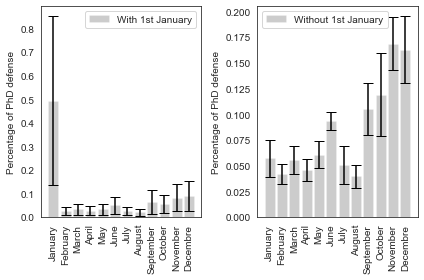

<Figure size 720x720 with 0 Axes>

In [59]:

fig, (ax1,ax2) = plt.subplots(1,2)
plt.sca(ax1)
ax1.bar(x,pivotTable_percen.mean(),yerr=pivotTable_percen.std(),align='center', alpha=0.2, ecolor='black', capsize=5,color='black')
plt.ylabel('Percentage of PhD defense')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],
            ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'Decembre'],
           rotation='vertical')

plt.sca(ax2)
ax2.bar(x,pivotTable_percenno11.mean(),yerr=pivotTable_percenno11.std(),align='center', alpha=0.2, ecolor='black', capsize=5,color='black')
plt.ylabel('Percentage of PhD defense')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],
            ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'Decembre'],
           rotation='vertical')

fig.tight_layout()
ax1.legend(["With 1st January"])
ax2.legend( ["Without 1st January"])
plt.figure(figsize=(10, 10))
plt.show()
fig.savefig('Compare__Jan_2005_2018.png', dpi=200) 

## 4.Comment la proportion des soutenances au premier janvier a-t-elle évolué au fil des ans ?

In [53]:
print( pivotTable.head(5))
print( pivotTable.index )
print( pivotTable['sum'] )

month de soutenance    1.0  2.0  3.0  4.0  5.0  6.0  7.0  8.0  9.0  10.0  \
Year                                                                       
2006.0               10889    4    2    2    8    7    2    6    8    22   
2007.0               11355    7   11   13   13   36   25   11   33    54   
2008.0               10744   55   63   63   72  106   40   48   88   159   
2009.0                9693  109  164  136  153  224  131  100  239   252   
2010.0                8458  176  287  205  202  375  234  212  394   501   

month de soutenance  11.0  12.0    sum  
Year                                    
2006.0                 19     6  10975  
2007.0                 72    67  11697  
2008.0                230   186  11854  
2009.0                409   423  12033  
2010.0                616   856  12516  
Float64Index([2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0,
              2014.0, 2015.0, 2016.0, 2017.0],
             dtype='float64', name='Year')
Year
2006.0 

Year
2006.0    10889
2007.0    11355
2008.0    10744
2009.0     9693
2010.0     8458
2011.0     6054
2012.0     4898
2013.0     3762
2014.0     2454
2015.0     1872
2016.0     1409
2017.0      805
dtype: int64


(100.0, 100000.0)

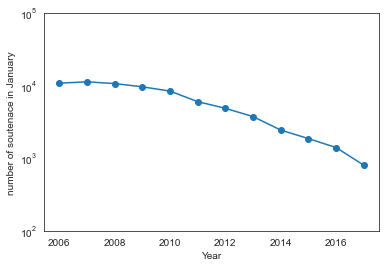

In [54]:
##ref 
##https://kanoki.org/2022/01/07/pandas-groupby-conditional-aggregation-by-filtering-column-value/
yearly_soutien1=month_soutien_year.groupby('Year').apply(lambda x: x[x['month de soutenance']==1]['Year'].count())
print('===========')
print(yearly_soutien1)
print('===========')
plt.plot(yearly_soutien1,'o-')
plt.xlabel('Year')
plt.ylabel('number of soutenace in January')
plt.yscale("log")
plt.ylim([1e2,1e5])



[0.996212838477561, 0.9917995444191344, 0.9702487817389074, 0.9014678589505652, 0.7939832128313804, 0.6543624161073825, 0.427536231884058, 0.31447979978548446, 0.23341505624459186, 0.1261930010604454, 0.08208554096598326, 0.04882375626687235, 0.0011430313190581422, 7.809449433814917e-05]


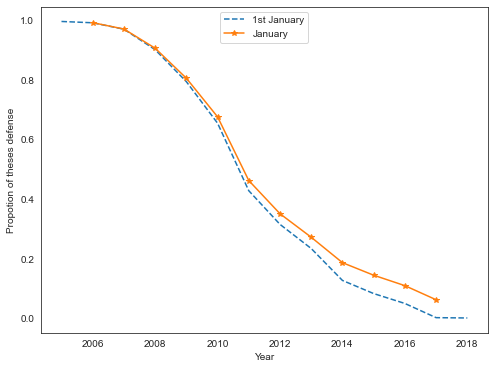

In [55]:
##methos as method percentage
pivotTable['Percentage_Jan']=pivotTable[1]/pivotTable['sum']
print(  Evo_perc_1_1)

####################
plt.figure(figsize=(8, 6))
plt.plot( range(2005,2019,1), Evo_perc_1_1 , linestyle='--' )
plt.plot(pivotTable.index.astype('int'), pivotTable['Percentage_Jan'],'*-')
plt.xlabel('Year')
plt.ylabel('Propotion of theses defense')
plt.legend(('1st January','January'), loc='upper center')
plt.show()
fig.savefig('11EvoDef_Jan_2005_2018.png', dpi=200) 

## 5. Nous allons ensuite nous intéresser à la question des homonymes chez les noms d’auteurs. Focalisez-vous sur le cas de Cécile Martin.

In [14]:
print('================')
print( data[data['Auteur'].str.contains('Cecile Martin')].Auteur )
print('================')
print(data[data['Auteur'].eq('Cecile Martin')].Auteur )
print('================')
row=data['Auteur'].eq('Cecile Martin')
print(row)
print('================')
print( data.loc[data['Auteur'].eq('Cecile Martin') ,['Auteur','Discipline','Year']] )

61289                      Cecile Martin
166820                     Cecile Martin
267565                     Cecile Martin
323148                Anne-Cecile Martin
410228                     Cecile Martin
410960                  Cecile Martineau
414771                     Cecile Martin
417535    Cecile Martinez-Percie du Sert
419136                   Cecile Martinat
426351                     Cecile Martin
432070                     Cecile Martin
440211            Cecile Martin-Chavigny
Name: Auteur, dtype: object
61289     Cecile Martin
166820    Cecile Martin
267565    Cecile Martin
410228    Cecile Martin
414771    Cecile Martin
426351    Cecile Martin
432070    Cecile Martin
Name: Auteur, dtype: object
0         False
1         False
2         False
3         False
4         False
          ...  
447639    False
447640    False
447641    False
447642    False
447643    False
Name: Auteur, Length: 447644, dtype: bool
               Auteur                                         Disc

In [16]:
print( data.loc[data['Auteur'].eq('Cecile Martin') ,['Auteur','Identifiant auteur','Year','Statut','Langue de la these','Discipline','Titre']] )  


               Auteur Identifiant auteur    Year    Statut Langue de la these  \
61289   Cecile Martin          203208145  2017.0  soutenue                 fr   
166820  Cecile Martin           81323557  2000.0  soutenue                 fr   
267565  Cecile Martin          179423568  2014.0  soutenue                 fr   
410228  Cecile Martin           81323557  2001.0  soutenue                 fr   
414771  Cecile Martin           81323557  1991.0  soutenue                 fr   
426351  Cecile Martin           81323557  1994.0  soutenue                 fr   
432070  Cecile Martin          182118703  1989.0  soutenue               enfr   

                                               Discipline  \
61289         Etudes cinematographiques et audiovisuelles   
166820  Sciences biologiques fondamentales et applique...   
267565                               Sciences economiques   
410228                     Genie des procedes industriels   
414771                                      Ne

In [20]:
print( data.loc[data['Auteur'].eq('Cecile Martin') ,[ 'Discipline']] )  

                                               Discipline
61289         Etudes cinematographiques et audiovisuelles
166820  Sciences biologiques fondamentales et applique...
267565                               Sciences economiques
410228                     Genie des procedes industriels
414771                                      Neurosciences
426351  Sciences biologiques et fondamentales applique...
432070                                           Physique


In [33]:
data[data['Discipline'].str.contains('Sciences biologiques fondamentales')==True].Discipline


6580       Sciences biologiques fondamentales et appliquees
17259      Sciences biologiques fondamentales et appliquees
19001     Sciences medicales. Sciences biologiques fonda...
31677      Sciences biologiques fondamentales et appliquees
32627      Sciences biologiques fondamentales et appliquees
                                ...                        
446797     Sciences biologiques fondamentales et appliquees
446801     Sciences biologiques fondamentales et appliquees
446858     Sciences biologiques fondamentales et appliquees
446984    Sciences appliquees. Terre, ocean, espace. Sci...
447372     Sciences biologiques fondamentales et appliquees
Name: Discipline, Length: 1824, dtype: object